In [31]:
#import library
import numpy as np
import pandas as pd

#to ensure we have consistent results
np.random.seed(42)

In [32]:
#Load the dataset
print('==> Loading the dataset...')
insurance=pd.read_csv("dataset2.csv")
print('done\n')

==> Loading the dataset...
done



In [33]:
insurance.columns

Index(['Agency Type', 'Distribution Channel', 'Claim', 'Duration',
       'Destination', 'Net Sales', 'Commision (in value)', 'Age'],
      dtype='object')

In [34]:
#display dataset
insurance
#display first 5 rows
insurance.head()

,Agency Type,Distribution Channel,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,0,0,0,119.0,0,-27.0,9.570,55.0
1,0,0,0,119.0,0,-27.0,9.570,55.0
2,0,1,0,65.0,1,-27.0,28.875,32.0
3,0,1,0,60.0,1,-27.0,23.760,32.0
4,0,1,0,79.0,2,-19.8,11.880,41.0


In [35]:
#Split the data set into the input matrix and output vector
x= insurance.drop('Net Sales', axis=1)
y=insurance['Net Sales']

In [6]:
#display x 
#Dataset that have remove column Claim
x

,Agency Type,Distribution Channel,Claim,Duration,Destination,Commision (in value),Age
0,0,0,0,119.0,0,9.570,55.0
1,0,0,0,119.0,0,9.570,55.0
2,0,1,0,65.0,1,28.875,32.0
3,0,1,0,60.0,1,23.760,32.0
4,0,1,0,79.0,2,11.880,41.0
...,...,...,...,...,...,...,...
63321,1,1,0,111.0,10,12.250,31.0
63322,1,1,0,58.0,14,14.000,40.0
63323,1,1,0,2.0,0,6.300,55.0
63324,1,1,0,3.0,7,6.300,55.0


In [36]:
#display the vector y[what we want to predict]
#column 'Net Sales' only
y

0       -27.0
1       -27.0
2       -27.0
3       -27.0
4       -19.8
         ... 
63321    35.0
63322    40.0
63323    18.0
63324    18.0
63325    26.0
Name: Net Sales, Length: 63326, dtype: float64

In [37]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 63326 entries, 0 to 63325
Series name: Net Sales
Non-Null Count  Dtype  
--------------  -----  
63326 non-null  float64
dtypes: float64(1)
memory usage: 494.9 KB


In [38]:
#Split the dataset into training and testing set
#80% training set
#20% test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=30)

In [39]:
#Standardize numeric data and normalize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=False)
scaler.fit(x_train)
x_train=scaler.transform(x_train)

In [40]:
y_train = y_train.values;  #convert to numpy array
#print the total number of rows and column
print('x_train.shape:', x_train.shape) 
print('y_train shape:', y_train.shape)

x_train.shape: (50660, 7)
y_train shape: (50660,)


# Random Forest Model

In [41]:
from sklearn.ensemble import RandomForestRegressor
#use train dataset
forest_reg=RandomForestRegressor(n_estimators=64, random_state=42)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=64, random_state=42)

In [44]:
y_pred=forest_reg.predict(x_train)
#predict using the same training data
#y_train should be similar to y_predict
#predict value similar to the actual value

In [46]:
# def show10results(y_train, y_pred):
    print('Result for the 10 random samples: ')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))

y_pred=forest_reg.predict(x_train)#predict
show10results(y_train, y_pred)

IndentationError: unexpected indent (2770748370.py, line 2)

In [47]:
#calculate root mean square error
from sklearn.metrics import mean_squared_error

forest_mse=mean_squared_error(y_pred, y_train)
forest_rmse=np.sqrt(forest_mse)
print('RMSE =', forest_rmse)

RMSE = 13.638218509916914


In [48]:
insurance['Net Sales'].mean()

35.140899946309915

# Evaluating using cross validation

In [49]:
from sklearn.model_selection import cross_val_score

k_fold_scores = cross_val_score(forest_reg, x_train, y_train, 
                                scoring = 'neg_mean_squared_error', cv=5)

forest_reg_rmse_scores = np.sqrt(-k_fold_scores)

def display_scores(scores):
    print('Scores:', scores, '\n')
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
display_scores(forest_reg_rmse_scores)

Scores: [20.23858027 20.49399371 20.39558962 20.4585955  20.06195153] 

Mean: 20.32974212875328
Standard deviation: 0.15996246778551493


In [50]:
#cross validation predict
from sklearn.model_selection import cross_val_predict

# perform cross-validatied prediction using cross_val_predict
y_pred_cv = cross_val_predict(forest_reg, x_train, y_train, cv=3)

def peek_results(actual, predicted, num = 20):
    print('actual |  Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', predicted[sel])
        
peek_results(y_train, y_pred_cv)        

actual |  Predicted
------------------
0.0  | 17.88187499999998
10.0  | 19.69911199288871
20.0  | 13.240625
10.0  | 26.063240343464617
13.0  | 16.201822916666668
93.0  | 75.7921875
30.0  | 55.31022454524535
32.0  | 24.39765625
16.0  | 16.0
13.43  | 13.025156250000009
21.0  | 24.621794394841267
41.0  | 30.819718408606317
39.6  | 31.049999999999972
31.0  | 34.565807531827694
20.0  | 10.447916666666666
20.0  | 16.83274675537579
16.0  | 24.84765625
79.2  | 62.48125
-27.0  | 23.025234375000014
11.0  | 23.23307810194299


In [51]:
y_train=pd.DataFrame(y_train)
y_pred_cv=pd.DataFrame(y_pred_cv)

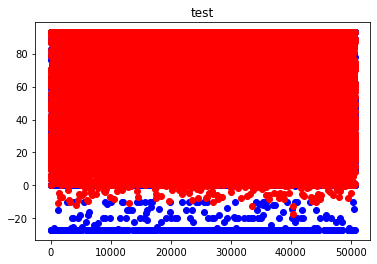

In [52]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_train,y_pred_cv,regressorName):
    if max(y_train) >= max(y_pred_cv):
        my_range = int(max(y_train))
    else:
        my_range = int(max(y_pred_cv))
    plt.scatter(range(len(y_train)), y_train, color='blue')
    plt.scatter(range(len(y_pred_cv)), y_pred_cv, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_train, y_pred_cv, "test")

C:\Users\shinj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shinj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shinj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shinj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

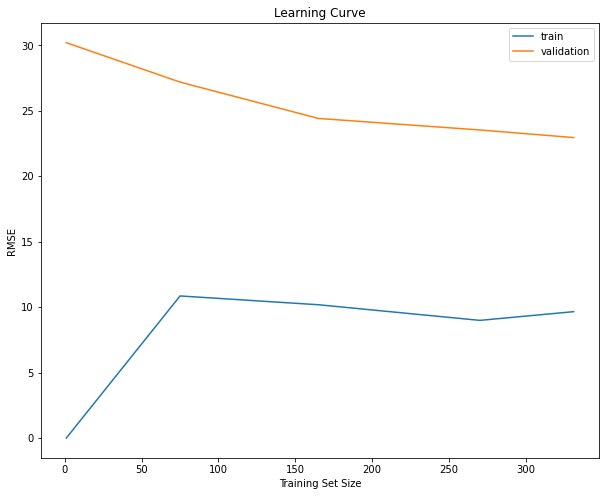

In [54]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=forest_reg,
    X=x_train,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 75, 165, 270, 331]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()